In [10]:
import numpy as np                   
import pandas as pa                 
import matplotlib.pyplot as plt      
import seaborn as sn                
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco 
from sklearn.model_selection import cross_val_score

### Import Data Frame assign the name fifa
* Print out the head() or first 5 rows

In [11]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Fixing Bad Data
* Stripped "€" and "K" from Wage
* Stripped "+" and "-" from the front of the columns
* Removed any part of the String after "+" and "-" and convert columns to float

In [12]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))

In [13]:
A = fifa["Age"] = fifa.Age.astype(float)
B = fifa["Overall"] = fifa.Overall.astype(float)
C = fifa["Wage"] = fifa.Wage.astype(float)
D = fifa["Potential"] = fifa.Potential.astype(float)

In [14]:
def removeStrings (X):
    if '+' in X:
        K = X.find('+')
        return X[:K]
    if '-' in X:
        K = X.find('-')
        return X[:K]
    else:  
        return X

In [15]:
def convertFloat(fifa, feature):
    for K in fifa.index: 
        fifa.loc[K,feature] = removeStrings(fifa.loc[K, feature])

    
    fifa.loc[:, feature] = fifa.loc[:,feature].astype("float")  
    return fifa

In [16]:
fifa = convertFloat(fifa, "Acceleration")
fifa = convertFloat(fifa, "Aggression")
fifa = convertFloat(fifa, "Agility")
fifa = convertFloat(fifa, "Balance")
fifa = convertFloat(fifa, "Ball control")

### Avalaible Columns
* Age, Overall, Potentail, Wage, Acceleration, Aggression, Agility, Balance, and Ball Control

## K- nearest neighbors

In [17]:
X = np.array(fifa[['Ball control', 'Overall']])
y = np.array(fifa.iloc[:, 7])

In [18]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [19]:
n = X.shape[0]
test = int(0.30*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]      
y_test = y[:test]
X_train = X[test:]   
y_train = y[test:]

In [20]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):
    
    h = 0.01 
    
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.6777373887115802
Testing R2: 0.6489491026426617


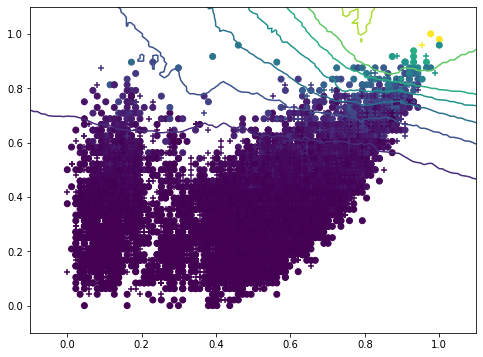

In [21]:
reg = KNeighborsRegressor(n_neighbors=100)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

#### Cross Validation

In [22]:
knn = cross_val_score(reg, X, y, cv=20)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: 0.679378865155394
KNN Standard Deviation R2: 0.038352680295015054


In [23]:
X = np.array(fifa[['Ball control', 'Agility']])
y = np.array(fifa.iloc[:, 3])

In [24]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [25]:
n = X.shape[0]
test = int(0.30*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       
y_test = y[:test]
X_train = X[test:]     
y_train = y[test:]

Training R2: 0.538587821399005
Testing R2: 0.5194921770863681


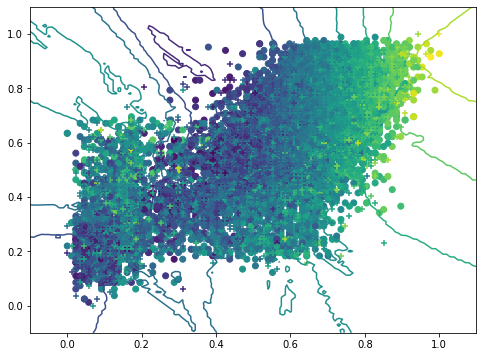

In [26]:
reg1 = KNeighborsRegressor(n_neighbors=25)
reg1.fit(X_train, y_train)
plot_reg_model(reg1, X_train, y_train, X_test, y_test)

#### Cross Validation

In [27]:
knn = cross_val_score(reg1, X, y, cv=20)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: 0.5047428057107036
KNN Standard Deviation R2: 0.02452083815235976


## PCA Model
* PCA Model with colums 7,8,9 vs Age

In [28]:
X = np.array(fifa.iloc[:,7:10])
y = np.array(fifa.iloc[:, 1])

pca = PCA(n_components=2)
Xpca = pca.fit_transform(X);

import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)          
perm = rn.permutation(n)   
X = Xpca[perm]
y = y[perm]
X_test = Xpca[:test]     
y_test = y[:test]
X_train = Xpca[test:]   
y_train = y[test:]


In [29]:
cat1 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.08438380542785111, 0.074972191323693)

In [30]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 
    
    x_min, x_max = -40.0, 40.0
    y_min, y_max = -20.0, 20.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 9.101386596599426e-06
Testing R2: -0.0002542745847891048


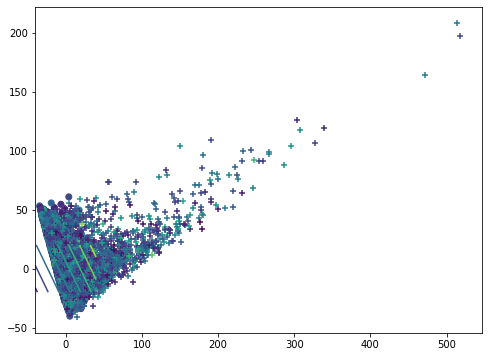

In [31]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

#### Cross Validation

In [32]:
pca = cross_val_score(reg, X, y, cv=10)
print('PCA Mean R2: {}'.format(pca.mean()))
print('PCA Standard Deviation R2: {}'.format(pca.std()))

PCA Mean R2: 0.03845007223282874
PCA Standard Deviation R2: 0.006898031715102141


* PCA Model With Columns 10,11,12 vs Age

In [33]:
X = np.array(fifa.iloc[:,10:13])                        
y = np.array(fifa.iloc[:, 1])

pca = PCA(n_components=2) 
Xpca = pca.fit_transform(X);

import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)            
perm = rn.permutation(n)   
X = Xpca[perm]
y = y[perm]
X_test = Xpca[:test]      
y_test = y[:test]
X_train = Xpca[test:]    
y_train = y[test:]


In [34]:
cat2 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat2.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.08623757971229423, 0.08186874304783093)

Training R2: 1.5441322247622402e-05
Testing R2: -0.0003398098493196944


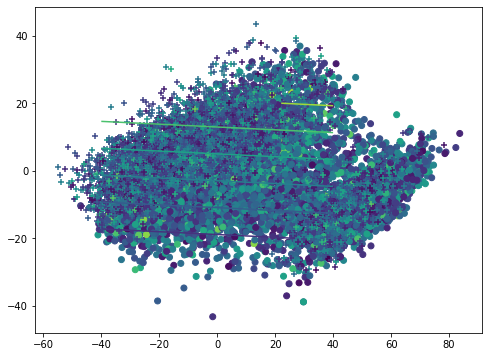

In [35]:
reg2 = LinearRegression()
reg2.fit(X_train,y_train)
plot_reg_model(reg2, X_train, y_train, X_test, y_test)

#### Cross Validation

In [36]:
pca = cross_val_score(reg2, X, y, cv=10)
print('PCA Mean R2: {}'.format(pca.mean()))
print('PCA Standard Deviation R2: {}'.format(pca.std()))

PCA Mean R2: 0.03381123513654418
PCA Standard Deviation R2: 0.0076273189359177705


### Regression Models Liner, Ridge, and Lasso

In [37]:
X = np.array(fifa[['Age', 'Overall']])
y = np.array(fifa['Wage'])

In [38]:
def plot_reg_model(reg, X, y):


    n = X.shape[0]
    test = int(0.20*n)           
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]      
    y_test = y[:test]
    X_train = X[test:]     
    y_train = y[test:]
    
    reg.fit(X_train, y_train) 
     
    nn = 200
    
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   
        np.linspace(y_min, y_max, nn))                    
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) 

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Training R2: 0.3821595216466985
Testing R2: 0.340067927934537


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

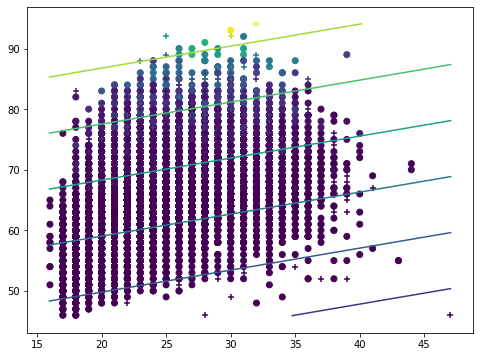

In [39]:
reg = LinearRegression()
plot_reg_model(reg, X, y)

Training R2: 0.37895686836996834
Testing R2: 0.3478770728138568


Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

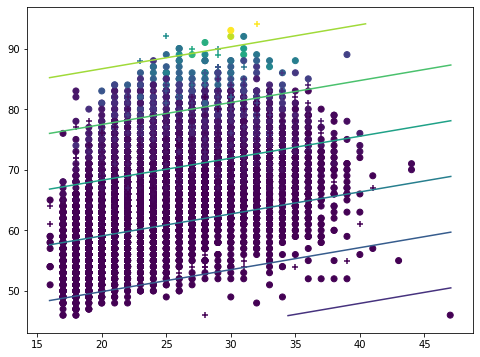

In [40]:
ridge_reg = Ridge(alpha=2)
plot_reg_model(ridge_reg, X, y)

Training R2: 0.3748950853110934
Testing R2: 0.3591137457858321


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

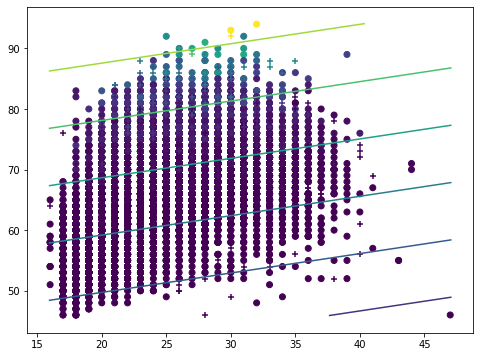

In [41]:
lasso_reg=Lasso(alpha=1)
plot_reg_model(lasso_reg, X, y)

Training R2: 0.7555760873739445
Testing R2: 0.7183989282981997


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

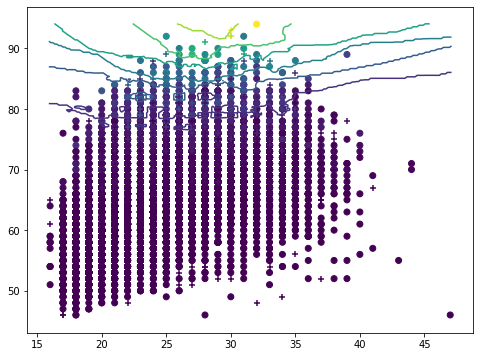

In [42]:
knn = KNeighborsRegressor(n_neighbors=10)
plot_reg_model(knn, X, y)

Training R2: 0.7864957444024853
Testing R2: 0.7012256192232356


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

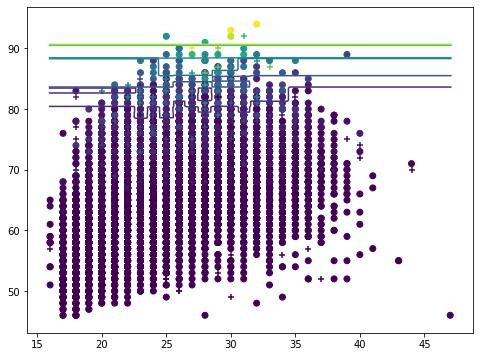

In [43]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree, X, y)

#### Cross Validation

In [44]:
lreg = cross_val_score(reg, X, y, cv=10)
ridge = cross_val_score(ridge_reg, X, y, cv=10)
LASSO = cross_val_score(lasso_reg, X, y, cv=10)
TREE = cross_val_score(tree, X, y, cv=10)

In [45]:
print('Linear Regression Mean R2: {}'.format(lreg.mean()))
print('Linear Regression Standard Deviation R2: {}'.format(lreg.std()))

Linear Regression Mean R2: -83.31855263403419
Linear Regression Standard Deviation R2: 237.01937423740821


In [46]:
print('Ridge Mean R2: {}'.format(ridge.mean()))
print('Ridge Standard Deviation R2: {}'.format(ridge.std()))

Ridge Mean R2: -83.31767530533001
Ridge Standard Deviation R2: 237.01691550468036


In [47]:
print('Lasso Mean R2: {}'.format(LASSO.mean()))
print('Lasso Standard Deviation R2: {}'.format(LASSO.std()))

Lasso Mean R2: -81.03511768363349
Lasso Standard Deviation R2: 230.99397781248348


In [48]:
print('Tree Mean R2: {}'.format(TREE.mean()))
print('Tree Standard Deviation R2: {}'.format(TREE.std()))

Tree Mean R2: -0.09281349373616797
Tree Standard Deviation R2: 0.093042535633659


## Nueral Networks

In [49]:
X = np.array(fifa[['Agility', 'Overall']])
y = np.array(fifa['Wage'])

In [50]:
def plot_reg_model(reg, X, y):


    n = X.shape[0]
    test = int(0.20*n)          
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]     
    y_test = y[:test]
    X_train = X[test:]   
    y_train = y[test:]
    
    reg.fit(X_train, y_train) 
     
    nn = 200
   
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   
        np.linspace(y_min, y_max, nn))                    
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) 
   
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

### Nueral Network Ridge Regression

Training R2: 0.3493035309906686
Testing R2: 0.37139079869900016


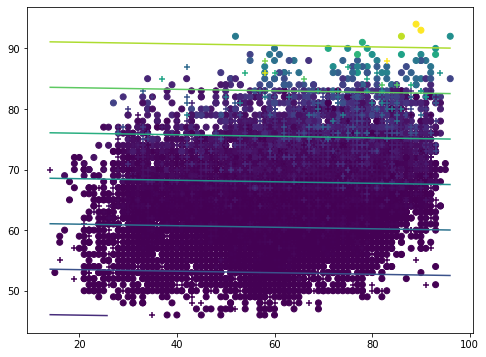

In [51]:
r_reg = Ridge(alpha=2)
plot_reg_model(r_reg, X, y);
plt.savefig('15.2.png')

In [52]:
ridge = cross_val_score(r_reg, X, y, cv=10)
print('Ridge Mean R2: {}'.format(ridge.mean()))
print('Ridge Standard Deviation R2: {}'.format(ridge.std()))

Ridge Mean R2: -89.69855976614753
Ridge Standard Deviation R2: 257.05798743335174


### Nueral Network Lasso Regression

Training R2: 0.35786226462328374
Testing R2: 0.3336773408757391


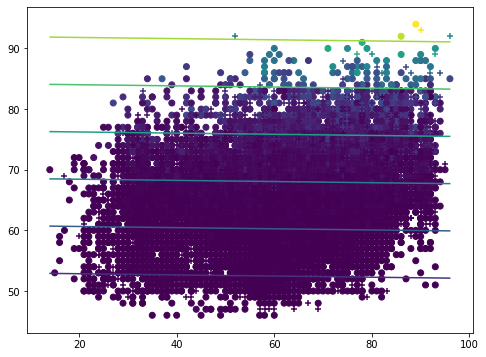

In [53]:
l_reg=Lasso(alpha=1)
plot_reg_model(l_reg, X, y);
plt.savefig('15.3.png')

In [54]:
lasso = cross_val_score(l_reg, X, y, cv=10)
print('Lasso Mean R2: {}'.format(lasso.mean()))
print('Lasso Standard Deviation R2: {}'.format(lasso.std()))

Lasso Mean R2: -86.86846732479378
Lasso Standard Deviation R2: 248.97339510556557


### Nueral Network K-nearest Neighbors Regression

Training R2: 0.7905638192430787
Testing R2: 0.6873603528657307


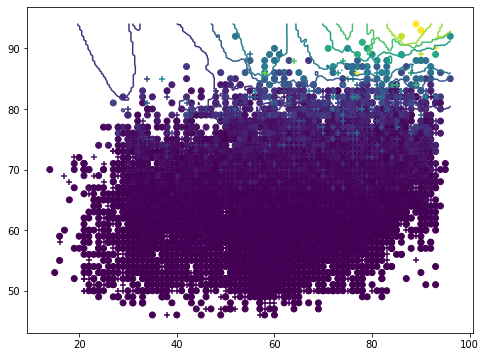

In [55]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y);
plt.savefig('15.4.png')

In [56]:
knn = cross_val_score(knn, X, y, cv=10)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: -0.2503245935877572
KNN Standard Deviation R2: 0.11359501797490984


### Nueral Network Decision Tree Regression

Training R2: 0.8097693738063564
Testing R2: 0.7057529569245888


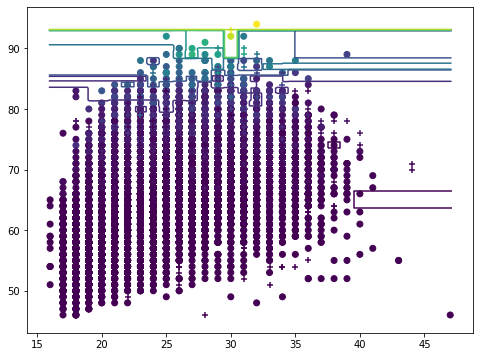

In [69]:
tree = DecisionTreeRegressor(max_depth=10)
plot_reg_model(tree, X, y);

In [70]:
from sklearn.tree import export_graphviz
import graphviz

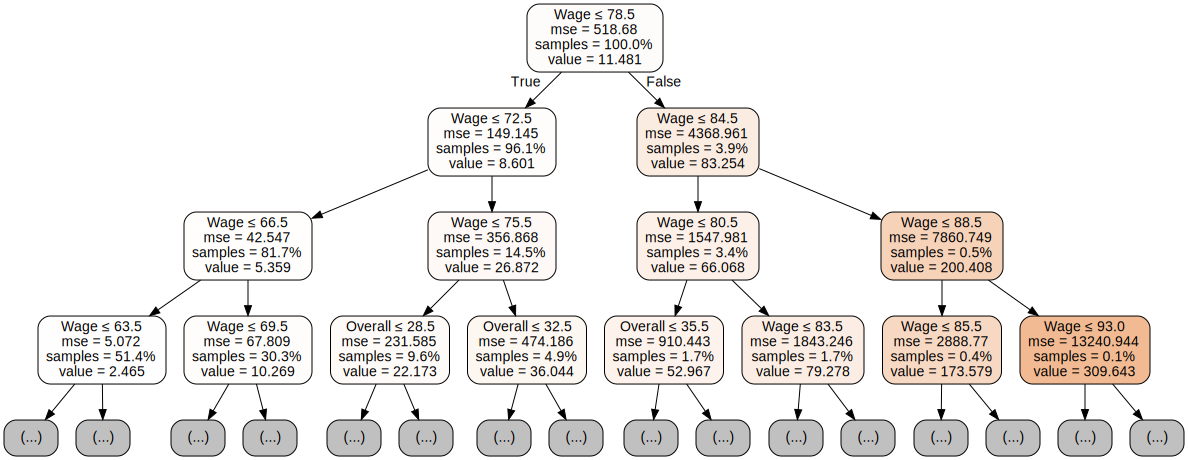

In [74]:
export_graphviz(tree, out_file='tree-1.dot', feature_names=['Overall', 'Wage'], rounded=True, filled=True,
                    special_characters=True, max_depth=3, proportion=True, precision=3,  leaves_parallel=False)

with open('tree-1.dot') as f:
    dot_graph = f.read()



display( graphviz.Source(dot_graph) )

In [58]:
tree = cross_val_score(tree, X, y, cv=10)
print('Tree Mean R2: {}'.format(tree.mean()))
print('Tree Standard Deviation R2: {}'.format(tree.std()))

Tree Mean R2: -0.342748454994971
Tree Standard Deviation R2: 0.5351621579466941


### Ensemble Methods

Training R2: 0.7453748655892096
Testing R2: 0.7461437389694071


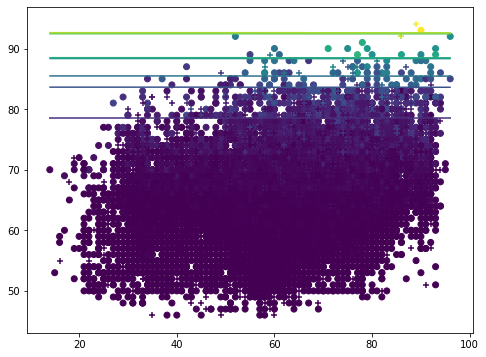

In [59]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
plot_reg_model(forest, X, y);
plt.savefig('15.6.png')

In [60]:
Ensemble = cross_val_score(forest, X, y, cv=10)
print('Ensemble Mean R2: {}'.format(Ensemble.mean()))
print('Ensemble Standard Deviation R2: {}'.format(Ensemble.std()))

Ensemble Mean R2: -0.5689636657243338
Ensemble Standard Deviation R2: 1.0035168047908924


### Gradient Boosting Esamble Network Model

Training R2: 0.8068901312911637
Testing R2: 0.7417878999648408


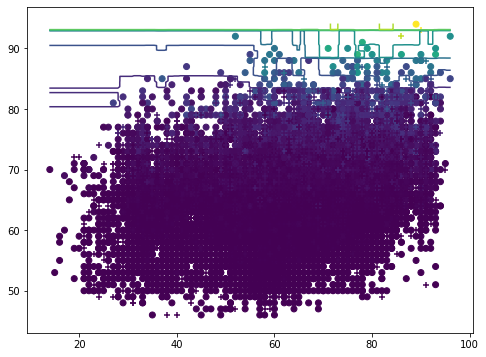

In [61]:
boost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)
plot_reg_model(boost, X, y);
plt.savefig('15.7.png')

In [62]:
Boost = cross_val_score(boost, X, y, cv=10)
print('Boost Mean R2: {}'.format(Boost.mean()))
print('Boost Standard Deviation R2: {}'.format(Boost.std()))

Boost Mean R2: -0.10927113584264173
Boost Standard Deviation R2: 0.13139277570036142


### Nueral Networks for Regression

In [63]:
X = np.array(fifa[['Age', 'Overall']])
y = np.array(fifa['Wage'])

In [64]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()  

Training R2: 0.7520842718026655
Testing R2: 0.7669003415620318


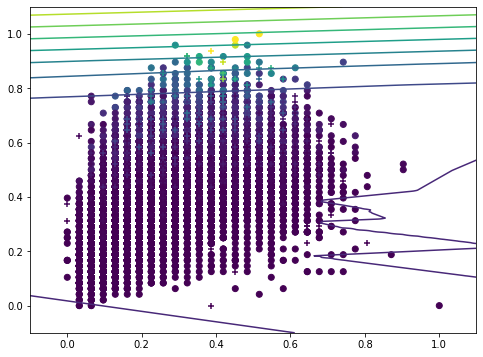

In [65]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y);
plt.savefig('15.8.png')

In [66]:
mlp = cross_val_score(mlp, X, y, cv=10)
print('MLP Mean R2: {}'.format(mlp.mean()))
print('MLP Standard Deviation R2: {}'.format(mlp.std()))

MLP Mean R2: -77.91844287354533
MLP Standard Deviation R2: 222.18252045833003


* adding an addtional layer to improve performance

Training R2: 0.7600287723780259
Testing R2: 0.7387366441107539


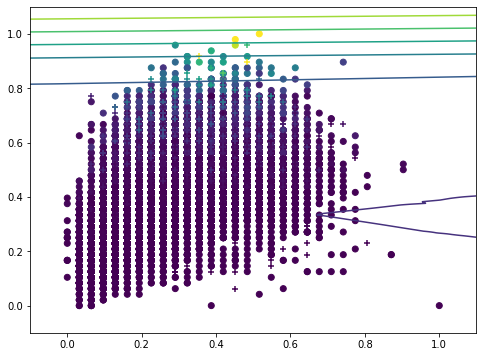

In [67]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp2, Xn, y);
plt.savefig('15.9.png')

In [68]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
mlp = cross_val_score(mlp2, Xn, y, cv=4)
print('MLP Mean R2: {}'.format(mlp.mean()))
print('MLP Standard Deviation R2: {}'.format(mlp.std()))

MLP Mean R2: -0.07909413421903827
MLP Standard Deviation R2: 0.1615078594938235


#### We tried to use the new method of running the cross validation on each our models but we are getting means and standard deviations that do not make sense and are completely off from our testing and training sets. Knowing that, we will try using different methods of cross validation from the scikitlearn website to see if those will work. If those different methods do not work we will go back to computing it by hand. 

## What's next
    * Input the decision tree (Jordana)
    * Find different method of cross validation that will produce accurate values (Lee)
    * Implement newest models (Lee and Luke)
    * Run already working models against different features (Linear,Ridge, Lasso - SAM) 
        (Remainding models will be split among Lee,Jordana, and Luke)